# FEATURE ENGINEERING - Project 1

# Objective - Provide recommendations or specific directions to SWIGGYTO management to improve the customer service by unleashing hidden insights from the Order Data shared

# Group 30

# Name/ID: 

### Prasanth Paleti / 2020AIML562
### Bhavya GS / 2020AIML593
### Sreenivas Vangala / 2020AIML590

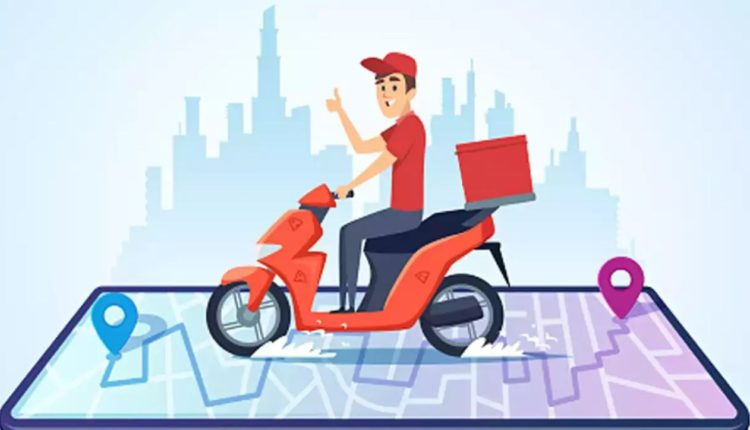

# Import Libraries
##### Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
%matplotlib inline

# Data
##### Let's start by reading in data from Food Order excel sheet into pandas dataframe

In [2]:
df = pd.read_excel('Food Orders - Shared-1.xlsx')

In [3]:
df.head()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


# (A)	DATA QUALITY AND TRANSFORMATION

### Sort Rows, Identify & Remove rows which hold duplicate data

In [4]:
# Sort the records by ID column
df.sort_values("ID", inplace=True) 
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
  
# Print the dupliate records from resultant Dataframe
duplicate

Duplicate Rows :


,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
15,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
11,11.0,NaN,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0


In [5]:
# dropping duplicate rows
df.drop_duplicates(keep='first',inplace=True)
#reset index, because we dropped few rows based on duplicate data
df.reset_index(drop = True, inplace = True)
df

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
5,6.0,NaN,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
6,7.0,NaN,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
7,8.0,NaN,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
8,9.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
9,10.0,NaN,1-July-2020 7.38 PM,3.0,Cancelled,150,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


### Upon further review of data records, there is record which has distorted/noise data inserted. Remove that record

In [6]:
#Remove the row with noise data

df.dropna(subset=["Status"], axis=0, inplace = True)

#reset index, because we dropped few rows based on duplicate data
df.reset_index(drop = True, inplace = True)
df

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,5.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
5,6.0,NaN,1-July-2020 7.38 PM,3.0,Delivered,280,PRO,1-July-2020 8.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
6,7.0,NaN,1-July-2020 9.38 AM,3.0,Delivered,120,BF,1-July-2020 9.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
7,8.0,NaN,1-July-2020 8.00 PM,6.0,Cancelled,230,PRO,1-July-2020 8.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
8,9.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,450,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
9,10.0,NaN,1-July-2020 7.38 PM,3.0,Cancelled,150,PRO,1-July-2020 8.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


### Validate date ranges for data consistency by creating a derived column/feature "Delivery Time In Minutes"

In [7]:
from datetime import datetime

df["Delivery_Time_In_Min"]= pd.to_datetime(df["Delivery Time"], format="%d-%B-%Y %I.%M %p") -pd.to_datetime(df["DateTime"], format="%d-%B-%Y %I.%M %p")

df["Delivery_Time_In_Min"]= df["Delivery_Time_In_Min"]/np.timedelta64(1, 'm') # Extract the minutes

# Diplays records with negative delivery time, if any. 

df[df["Delivery_Time_In_Min"]<0]



,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Delivery_Time_In_Min
52,310.0,NaN,4-July-2020 8.38 PM,3.0,Delivered,500,NaN,4-July-2020 7.38 PM,25.0,NaN,...,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,5.0,-60.0
53,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0,-60.0


### Inference from above: delivery time should be greater than order time, but the same is not true for the above two records, so correct the invalid data values

In [8]:
#Correcting the date records where the deliverytime and ordertime might have been potentially swapped while capturing data for these two records
#Recalculate the "delivery time in minutes" with corrected records in the dataframe
array = [423, 310]
df.loc[df['ID'].isin(array)]
df[['DateTime','Delivery Time']] = df[['Delivery Time','DateTime']].where(df['ID'].isin(array), df[['DateTime','Delivery Time']].values)
df["Delivery_Time_In_Min"]= pd.to_datetime(df["Delivery Time"], format="%d-%B-%Y %I.%M %p") -pd.to_datetime(df["DateTime"], format="%d-%B-%Y %I.%M %p")
df["Delivery_Time_In_Min"]= df["Delivery_Time_In_Min"]/np.timedelta64(1, 'm')


### Drop the DateTime and DeliveryTime,as newly added dervied columns "Delivery_Time_In_Min" created for insights

In [9]:
df.drop('DateTime', axis='columns', inplace=True)
df.drop('Delivery Time', axis='columns', inplace=True)

In [10]:
#Verify the columns are removed successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    56 non-null     float64
 1   Provider              0 non-null      float64
 2   Distance              57 non-null     float64
 3   Status                57 non-null     object 
 4   Cost                  57 non-null     object 
 5   PromoCode             34 non-null     object 
 6   Discount              22 non-null     float64
 7   Paid amount           0 non-null      float64
 8   Payment mode          57 non-null     object 
 9   Delivery charges      57 non-null     object 
 10  Surge charges         27 non-null     object 
 11  Packaging charges     57 non-null     object 
 12  ST                    57 non-null     object 
 13  Tip                   23 non-null     float64
 14  PureVeg               57 non-null     object 
 15  Items                 57 

### Also, Referring to the columns -> ID and Provider, they are not having any significance in the analysis
### If you look at the data, Type and PureVeg Columns indicate same information and hence communicate redundant info
### Hence, removing the columns -> ID, provide and Type

In [11]:
df.drop('ID', axis='columns', inplace=True)
df.drop('Provider', axis='columns', inplace=True)
df.drop('Type', axis='columns', inplace=True)

### Verify the columns for null/missing values and the datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Distance              57 non-null     float64
 1   Status                57 non-null     object 
 2   Cost                  57 non-null     object 
 3   PromoCode             34 non-null     object 
 4   Discount              22 non-null     float64
 5   Paid amount           0 non-null      float64
 6   Payment mode          57 non-null     object 
 7   Delivery charges      57 non-null     object 
 8   Surge charges         27 non-null     object 
 9   Packaging charges     57 non-null     object 
 10  ST                    57 non-null     object 
 11  Tip                   23 non-null     float64
 12  PureVeg               57 non-null     object 
 13  Items                 57 non-null     object 
 14  Membership            57 non-null     object 
 15  Rating                55 

### Seems the categorical attributes are still shown as the objects, needs to convert them to categories.
### For numeric Columns convert datatype from object to float64 

In [13]:
df=df.astype({"Status":'category',"Cost":'float64',"PromoCode":'category',"Payment mode":'category',"Delivery charges":'float64',"Surge charges":'float64',"Packaging charges":'float64',"ST":'float64',"PureVeg":'category',"Items":'category',"Membership":'category'})

### Verify of datatypes are successfully changed

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Distance              57 non-null     float64 
 1   Status                57 non-null     category
 2   Cost                  57 non-null     float64 
 3   PromoCode             34 non-null     category
 4   Discount              22 non-null     float64 
 5   Paid amount           0 non-null      float64 
 6   Payment mode          57 non-null     category
 7   Delivery charges      57 non-null     float64 
 8   Surge charges         27 non-null     float64 
 9   Packaging charges     57 non-null     float64 
 10  ST                    57 non-null     float64 
 11  Tip                   23 non-null     float64 
 12  PureVeg               57 non-null     category
 13  Items                 57 non-null     category
 14  Membership            57 non-null     category
 15  Rating  

In [15]:
df.describe()

,Distance,Cost,Discount,Paid amount,Delivery charges,Surge charges,Packaging charges,ST,Tip,Rating,Delivery_Time_In_Min
count,57.000000,57.000000,22.000000,0.0,57.000000,27.000000,57.0,57.0,23.0,55.000000,57.000000
mean,3.614035,291.403509,34.090909,NaN,21.754386,14.074074,10.0,5.0,5.0,2.400000,52.807018
std,1.359548,138.795052,18.168285,NaN,2.407434,5.007117,0.0,0.0,0.0,1.780553,29.851082
min,-2.000000,100.000000,-25.000000,NaN,20.000000,10.000000,10.0,5.0,5.0,0.000000,0.000000
25%,3.000000,200.000000,25.000000,NaN,20.000000,10.000000,10.0,5.0,5.0,0.500000,20.000000
50%,3.000000,280.000000,25.000000,NaN,20.000000,10.000000,10.0,5.0,5.0,3.000000,60.000000
75%,4.000000,400.000000,50.000000,NaN,25.000000,20.000000,10.0,5.0,5.0,4.000000,60.000000
max,6.000000,600.000000,50.000000,NaN,25.000000,20.000000,10.0,5.0,5.0,5.000000,95.000000


### From above we can observe that Distance and Discount minimum values are negative which is invalid data
### To correct the same replacing with Modulus or positive equivalent value

In [16]:
df['Discount'].replace(-25,25,inplace=True)
df['Distance'].replace(-2,2,inplace=True)

In [17]:
#Verify the columns for no of null records
df.isnull().sum()

Distance                 0
Status                   0
Cost                     0
PromoCode               23
Discount                35
Paid amount             57
Payment mode             0
Delivery charges         0
Surge charges           30
Packaging charges        0
ST                       0
Tip                     34
PureVeg                  0
Items                    0
Membership               0
Rating                   2
Delivery_Time_In_Min     0
dtype: int64

### Columns like Promocode, Discount, Paid amount, Surge charges, Tip, Rating have missing values.

### Methods to fill the missing values:

   #### For numerical variables: imputation using mean or median
   #### For categorical variables: imputation using mode

In [18]:
#Let's explore the unique data values from category column PromoCode that helps in making decisions in addressing missing values
print(df['PromoCode'].unique())

['PRO', 'BF', NaN]
Categories (2, object): ['PRO', 'BF']


### Impute Promocode with category value 'NA' to indicate missing-ness or "No Promo code Used"

In [19]:
df["PromoCode"]= df["PromoCode"].astype('string')
df["PromoCode"].fillna('NA', inplace = True)
df["PromoCode"] = df["PromoCode"].astype('category')

### Impute Discount, Tip amd Surge columns with zero to indicate missingness or "Not Applicable"

In [20]:
df['Discount'] = df['Discount'].fillna(0)

df['Tip'] = df['Tip'].fillna(0)

df['Surge charges'] = df['Surge charges'].fillna(0)

### Impute Rating which is a numeric column with median

In [21]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

### Populate "Paid amount" column based on Cost, Discount, Delivery charges, Surge charges, Packaging charges, ST, Tip

In [22]:
df['Paid amount'] = np.where(df['Paid amount'].isnull(), df['Cost'] + df['Delivery charges'] + df['Surge charges'] + df['Packaging charges'] + df['ST'] + df['Tip'] - df['Discount'], 0)

### Verify if null values are addressed successfully

In [23]:
df.isnull().sum()

Distance                0
Status                  0
Cost                    0
PromoCode               0
Discount                0
Paid amount             0
Payment mode            0
Delivery charges        0
Surge charges           0
Packaging charges       0
ST                      0
Tip                     0
PureVeg                 0
Items                   0
Membership              0
Rating                  0
Delivery_Time_In_Min    0
dtype: int64

### Considering Cost, Discount, Delivery charges, Surge charges, Packaging charges, ST, Tip column data is aggregated and accounted under "paid amount", dropping the Cost, Discount, Delivery charges, Surge charges, Packaging charges, ST, Tip columns to simplify the dataset

In [24]:
df.drop('Cost', axis='columns', inplace=True)
df.drop('Discount', axis='columns', inplace=True)
df.drop('Delivery charges', axis='columns', inplace=True)
df.drop('Surge charges', axis='columns', inplace=True)
df.drop('Packaging charges', axis='columns', inplace=True)
df.drop('ST', axis='columns', inplace=True)
df.drop('Tip', axis='columns', inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Distance              57 non-null     float64 
 1   Status                57 non-null     category
 2   PromoCode             57 non-null     category
 3   Paid amount           57 non-null     float64 
 4   Payment mode          57 non-null     category
 5   PureVeg               57 non-null     category
 6   Items                 57 non-null     category
 7   Membership            57 non-null     category
 8   Rating                57 non-null     float64 
 9   Delivery_Time_In_Min  57 non-null     float64 
dtypes: category(6), float64(4)
memory usage: 2.9 KB


In [26]:
df.describe()

,Distance,Paid amount,Rating,Delivery_Time_In_Min
count,57.000000,57.000000,57.000000,57.000000
mean,3.684211,322.807018,2.421053,52.807018
std,1.151984,142.700415,1.752013,29.851082
min,2.000000,85.000000,0.000000,0.000000
25%,3.000000,225.000000,1.000000,20.000000
50%,3.000000,290.000000,3.000000,60.000000
75%,4.000000,435.000000,4.000000,60.000000
max,6.000000,660.000000,5.000000,95.000000


# Univariate Analysis

# Explore Target Variable
Count of each target variable value will give some insights about the samples those are available for the prediction.

In [27]:
df['Rating'].value_counts()

3.0    17
0.0    14
5.0     8
4.0     8
1.0     5
2.0     5
Name: Rating, dtype: int64

In [28]:
Majority_Rating_per = (17+14+5+5)/(17+14+8+8+5+5)*100

zero_rating_per = 14/(17+14+8+8+5+5)*100

print(Majority_Rating_per, zero_rating_per)

71.9298245614035 24.561403508771928


<AxesSubplot:>

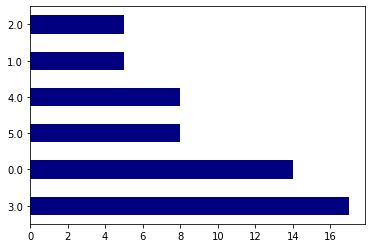

In [29]:
#Set the color coding for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
df['Rating'].value_counts().plot.barh(cmap=cmap)

### It can be observed from above that the 72% of order ratings are within {0-3} range with around 25% of these orders rated as zero.

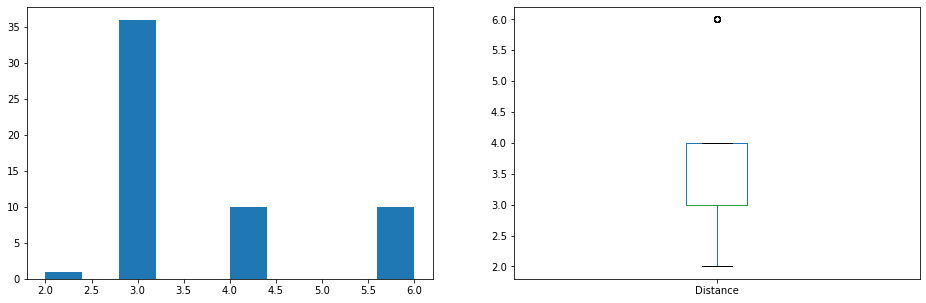

In [30]:
# Univariate Analysis of Distance Feature
plt.subplot(121)
plt.hist(df['Distance'])
plt.subplot(122)
df['Distance'].plot.box(figsize=(16,5)) 
plt.show()

## It can be observed from above that the distance attribute has outlier and skewing which needs to be addressed before model building

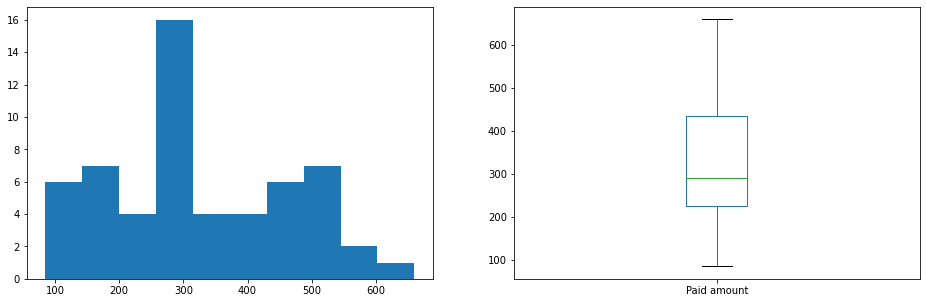

In [31]:
# Univariate Analysis of Paid Amount Feature
plt.subplot(121)
plt.hist(df['Paid amount'])
plt.subplot(122)
df['Paid amount'].plot.box(figsize=(16,5)) 
plt.show()

# It can be noted that there is no outliers in this indepedant variable

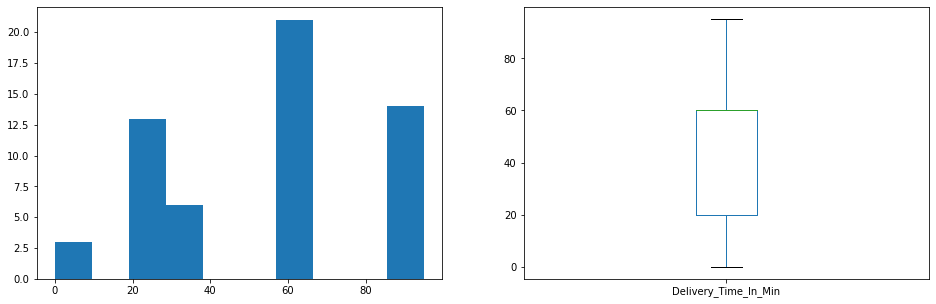

In [32]:
# Univariate Analysis of Deliver time in minutes Feature
plt.subplot(121)
plt.hist(df['Delivery_Time_In_Min'])
plt.subplot(122)
df['Delivery_Time_In_Min'].plot.box(figsize=(16,5)) 
plt.show()

# It can be noted that there is no outliers in this indepedant variable

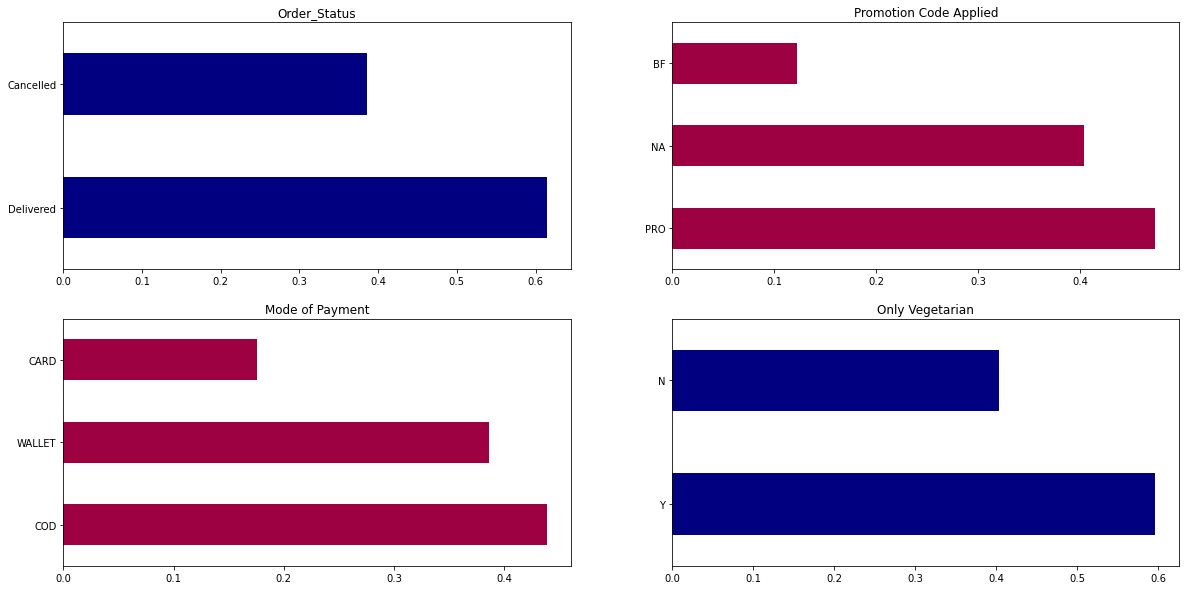

In [33]:
#Prepare a 2 by 2 layout two render categorical attributes
cmap1 = cm.get_cmap('Spectral')

plt.figure(1) 

plt.subplot(221) 
df['Status'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'Order_Status') 

plt.subplot(222) 
df['PromoCode'].value_counts(normalize=True).plot.barh(title= 'Promotion Code Applied', cmap=cmap1) 

plt.subplot(223) 
df['Payment mode'].value_counts(normalize=True).plot.barh(title= 'Mode of Payment', cmap=cmap1) 

plt.subplot(224) 
df['PureVeg'].value_counts(normalize=True).plot.barh(title= 'Only Vegetarian', cmap=cmap) 
plt.show()



### The inferences are :
### Nearly 40% orders are cancelled, which is not a great sign
### 60% of the orders placed with promotion code and 40% are without.
### 82% of orders are paid via COD or Wallet money. Cards contribute to only 18% of total payment method
### Nearly 60% of orders are from vegetarian population

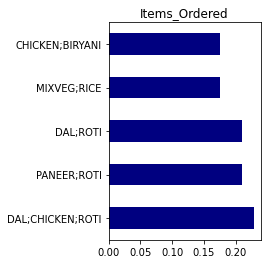

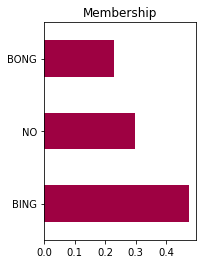

In [34]:
plt.subplot(121) 
df['Items'].value_counts(normalize=True).plot.barh(title= 'Items_Ordered', cmap=cmap) 
plt.show()

plt.subplot(122) 
df['Membership'].value_counts(normalize=True).plot.barh(title= 'Membership', cmap=cmap1) 
plt.show()

### The inferences are :

### Nearly 60% of orders are for vegetarian dishes which is consistent with Veg Only population
### Nearly 70% of orders are placed by membership population

# Bivariant Analysis

### We got fair idea about the distribution of the categorical and numerical attributes present in data frame. 

### Lets explore the relationship between these variables and the target.

In [35]:
Distance=pd.crosstab(df['Distance'],df['Rating'])

<AxesSubplot:xlabel='Distance'>

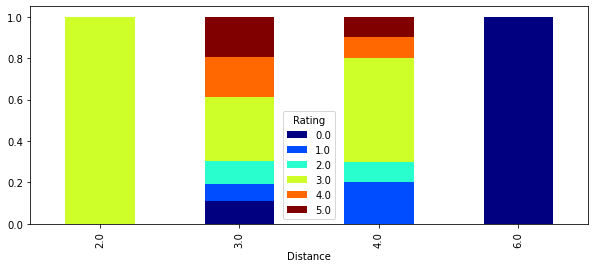

In [36]:
Distance.div(Distance.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))

### The Inferences are:

### 64% of deliveries with medium rating 3 are within the delivery distance of 3KM(assumed KM)

### 100% deliveried which are beyond 6 KM's received a 0 rating



In [37]:
Total_Bill=pd.crosstab(df['Paid amount'],df['Rating'])

<AxesSubplot:xlabel='Paid amount'>

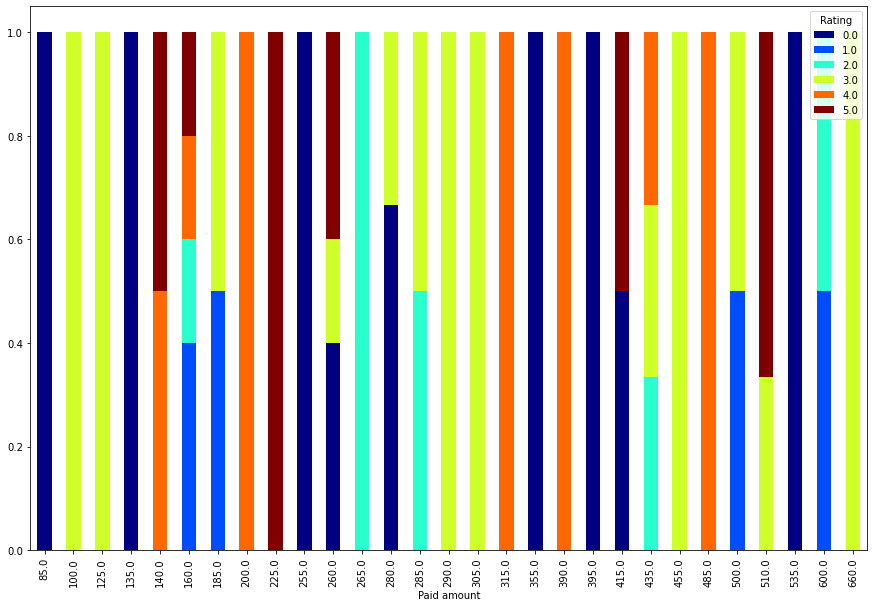

In [38]:
Total_Bill.div(Total_Bill.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(15,10))

### The Inferences are

### Rating is evenly distributed across the various total bill amounts and no specific strong inferences can be drawn

In [39]:
Delivery_Time=pd.crosstab(df['Delivery_Time_In_Min'],df['Rating'])
Delivery_Time

Rating,0.0,1.0,2.0,3.0,4.0,5.0
Delivery_Time_In_Min,,,,,,
0.0,0,1,1,1,0,0
20.0,0,0,0,3,5,5
30.0,6,0,0,0,0,0
60.0,4,2,3,8,2,2
90.0,4,0,0,0,0,0
95.0,0,2,1,5,1,1


<AxesSubplot:xlabel='Delivery_Time_In_Min'>

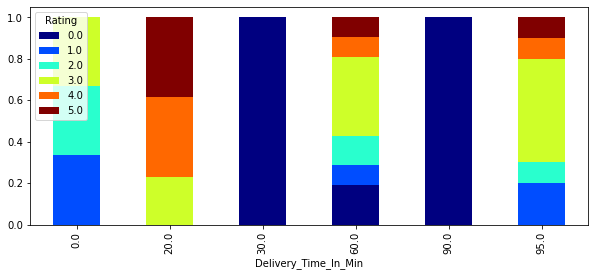

In [40]:
Delivery_Time.div(Delivery_Time.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))

### Inference:
    
### 45% of deliveries within 60 minutes are rated 3 and above

<AxesSubplot:xlabel='PureVeg'>

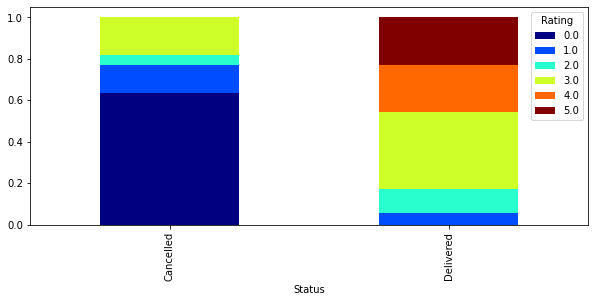

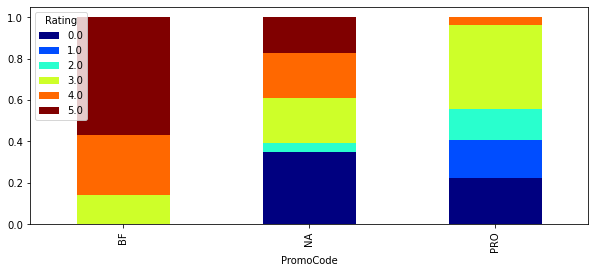

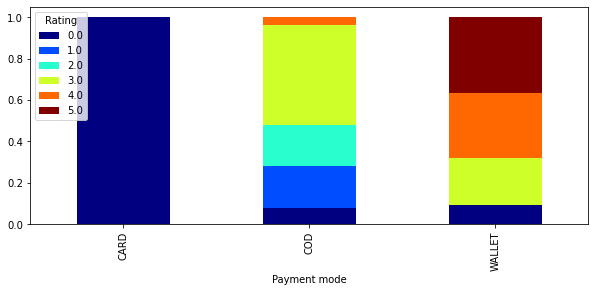

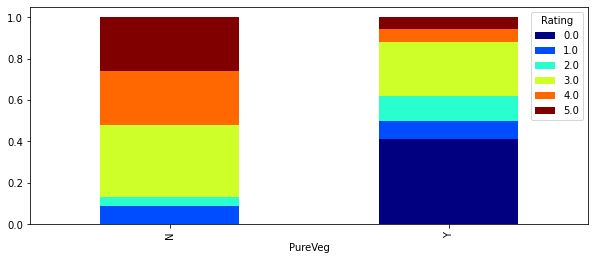

In [41]:
cmap1 = cm.get_cmap('Spectral')

Status=pd.crosstab(df['Status'],df['Rating'])
PromoCode=pd.crosstab(df['PromoCode'],df['Rating'])
Payment_mode=pd.crosstab(df['Payment mode'],df['Rating'])
PureVeg=pd.crosstab(df['PureVeg'],df['Rating'])
Items=pd.crosstab(df['Items'],df['Rating'])
Membership=pd.crosstab(df['Membership'],df['Rating'])

Status.div(Status.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))

PromoCode.div(PromoCode.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))

Payment_mode.div(Payment_mode.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))

PureVeg.div(PureVeg.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))



### Inferences:

#### 1. No orders are rated 0 when the orders are delivered successfully, leaving the rating less than 3 on orders which are cancelled

#### 2. Promocode BF received higher ratings than PRO

#### 3. People using card for payment rated the experience as low compared to people using Wallet and COD. Wallet customers are most delighted giving higest rating for the orders

#### 4. Majority of Non-Veg population rated the orders 3 and above while the veg population rated 40% of orders as zero rating.This can also infer that majority of orders cancelled are vegetarian orders.


<AxesSubplot:xlabel='Membership'>

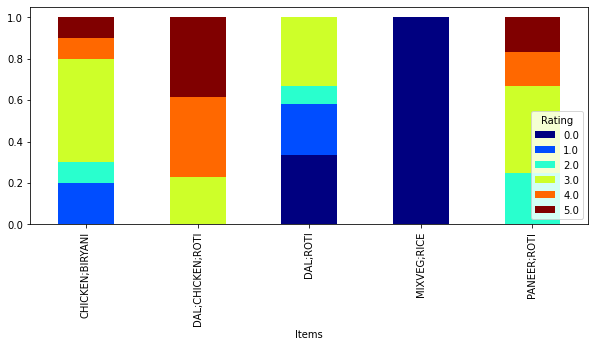

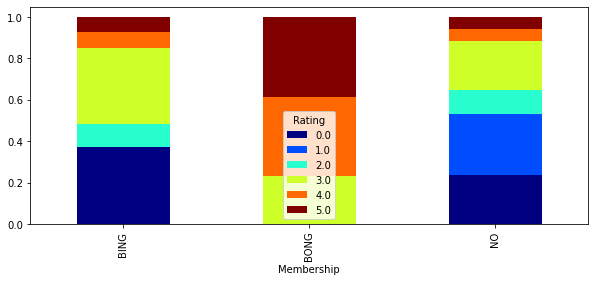

In [42]:
Items.div(Items.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))

Membership.div(Membership.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(10,4))

### Inferences:
    
#### 1. Least rated food item is "mixed_veg;Rice" while none of the non veg items are rated zero
#### 2. People having BONG Membership are very delighted compared to BING

# Treating Outliers

#### In Distance  attribute we noticed outlier while plotting Univariate graphs.

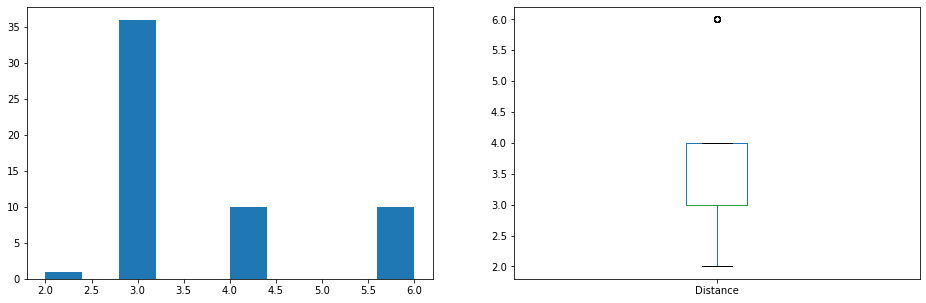

In [43]:
#Before Outlier Treatment of Distance Feature
plt.subplot(121)
plt.hist(df['Distance'])
plt.subplot(122)
df['Distance'].plot.box(figsize=(16,5)) 
plt.show()

### One way to remove the outliner and skewness is by doing the log transformation. With log transformation, it does not affect the smaller values much, but reduces the larger values, so it gives a distribution similar to normal distribution

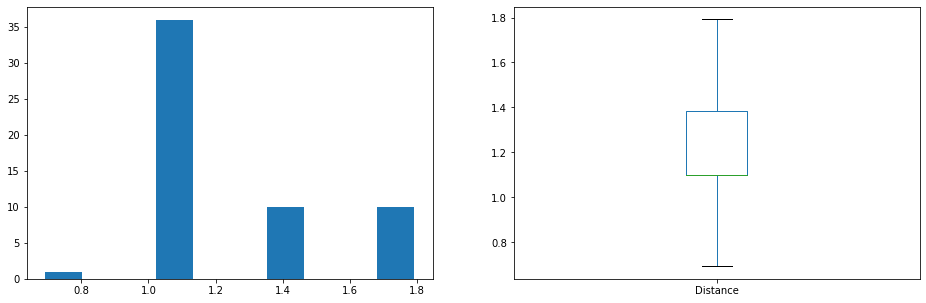

In [44]:
# Addressing Distance Attribute Outliner using Log transformation
df['Distance'] = np.log(df['Distance']) 
plt.subplot(121)
plt.hist(df['Distance'])
plt.subplot(122)
df['Distance'].plot.box(figsize=(16,5)) 
plt.show()

# Creating Dummy Variables to convert Categorial to Numerical for model building

In [45]:
odf=df
df = pd.get_dummies(df)
bdf=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                57 non-null     float64
 1   Paid amount             57 non-null     float64
 2   Rating                  57 non-null     float64
 3   Delivery_Time_In_Min    57 non-null     float64
 4   Status_Cancelled        57 non-null     uint8  
 5   Status_Delivered        57 non-null     uint8  
 6   PromoCode_BF            57 non-null     uint8  
 7   PromoCode_NA            57 non-null     uint8  
 8   PromoCode_PRO           57 non-null     uint8  
 9   Payment mode_CARD       57 non-null     uint8  
 10  Payment mode_COD        57 non-null     uint8  
 11  Payment mode_WALLET     57 non-null     uint8  
 12  PureVeg_N               57 non-null     uint8  
 13  PureVeg_Y               57 non-null     uint8  
 14  Items_CHICKEN;BIRYANI   57 non-null     uint

# Scaling

In [46]:
Y= pd.DataFrame(df.iloc[:,2].values)
Y1=Y.copy()
from sklearn.preprocessing import StandardScaler
stdScale=StandardScaler()
column_names=df.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].columns
X= pd.DataFrame(stdScale.fit_transform(df.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values),columns=column_names)
X1=X.copy()

### Building Regression Model with All the Available Features in the DataSet

### Split the dataset into train, test

In [47]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)

In [48]:
#Fitting multiple linear regression to trainingset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [49]:
#Predicting the test set results & displaying the intercept & co-efficient
Y_pred = regressor.predict(X_train)
print("intercept",regressor.intercept_)
print("coefficients",regressor.coef_)

intercept [2.4152223]
coefficients [[-0.39145468  0.00824021 -0.13295289 -0.16982789  0.16982789  0.03657998
  -0.11305954  0.08704267 -0.27843277 -0.2128373   0.43447625  0.14059656
  -0.14059656  0.1717458   0.00871026  0.05696495 -0.27843277  0.03360259
   0.34407122  0.00871026 -0.38351155]]


In [50]:
#Calculate Metrics
from sklearn.metrics import mean_squared_error,r2_score
print("Train Mean Square Error=", mean_squared_error(Y_train,Y_pred))
print("Train Root Mean Square Error=", np.sqrt(mean_squared_error(Y_train,Y_pred)))
print("Train R Square Value=", r2_score(Y_train,Y_pred))


Train Mean Square Error= 0.6406920484582158
Train Root Mean Square Error= 0.8004324134230296
Train R Square Value= 0.7731815737538659


In [51]:
#Predicting the test set results & displaying the intercept & co-efficient
Y_pred = regressor.predict(X_test)
print("intercept",regressor.intercept_)
print("coefficients",regressor.coef_)

intercept [2.4152223]
coefficients [[-0.39145468  0.00824021 -0.13295289 -0.16982789  0.16982789  0.03657998
  -0.11305954  0.08704267 -0.27843277 -0.2128373   0.43447625  0.14059656
  -0.14059656  0.1717458   0.00871026  0.05696495 -0.27843277  0.03360259
   0.34407122  0.00871026 -0.38351155]]


In [52]:
#Calculate Metrics
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Square Error=", mean_squared_error(Y_test,Y_pred))
print("Root Mean Square Error=", np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("R Square Value=", r2_score(Y_test,Y_pred))

Mean Square Error= 0.5862485187061184
Root Mean Square Error= 0.7656686742358724
R Square Value= 0.8425003979595503


# It can be observed that the prediction accuracy of the model with all features considered in modelling is 84.250% from the R Square value

Text(0.5, 1.0, 'actual vs predicted')

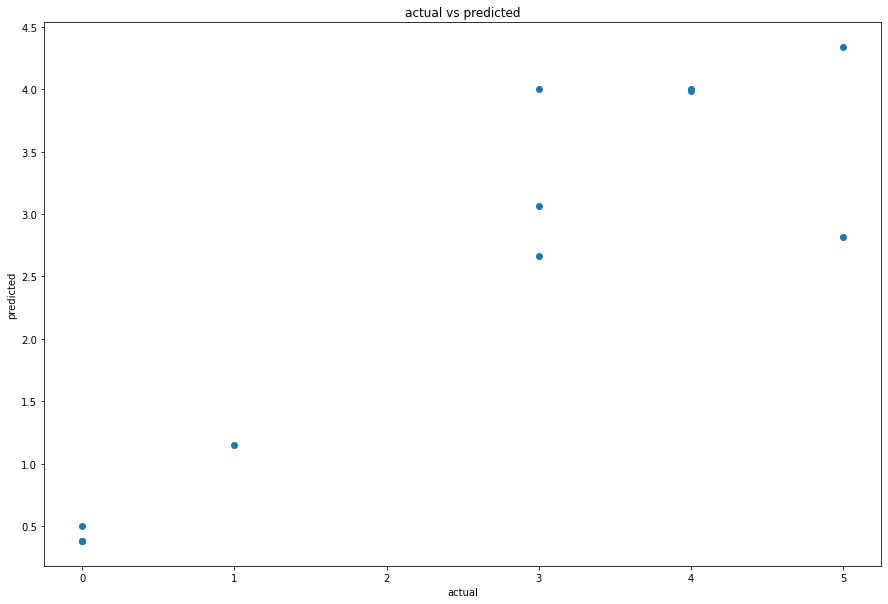

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')

# Feature sub-set selection techniques

## One of the methods is using the Pearson Correlation inorder to determine the significant features for model building

# HeatMap for visualizing correlation in Original DataSet

<AxesSubplot:>

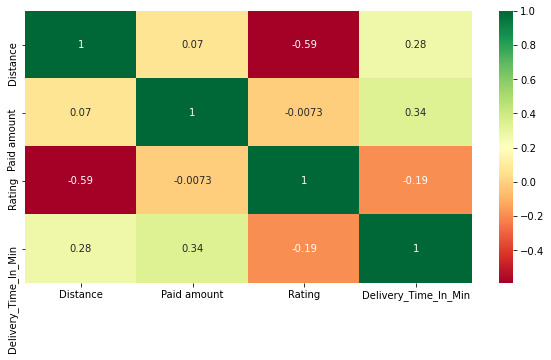

In [54]:
plt.figure(figsize = (10,5))
sns.heatmap(odf.corr(),annot=True,cmap='RdYlGn')

# Inferences:
    
### There is a high negative correlation between rating and distance while it is negligible correlation with paid amount. A small negative correlation exists between delivery time and rating.



### Now,using Seaborn, let's also visualize the relations between these features and our target variable Rating by using a regression plot.

<AxesSubplot:xlabel='Distance', ylabel='Rating'>

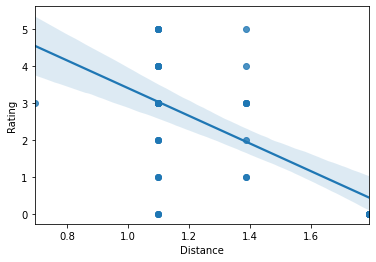

In [55]:
sns.regplot(x='Distance',y='Rating',data=df)


#### Notice from the graph that, as Distance increases, the rating decreases denoting a negative relation as defined in correlation

<AxesSubplot:xlabel='Paid amount', ylabel='Rating'>

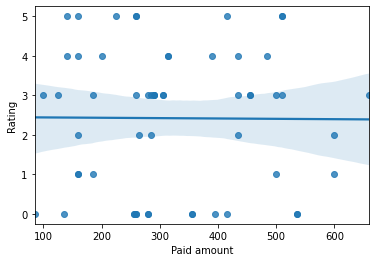

In [56]:
sns.regplot(x='Paid amount',y='Rating',data=df)

<AxesSubplot:xlabel='Delivery_Time_In_Min', ylabel='Rating'>

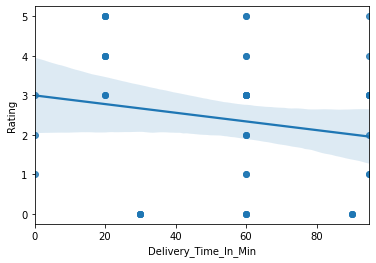

In [57]:
sns.regplot(x='Delivery_Time_In_Min',y='Rating',data=df)

## Considering the negligible correlation of rating with paid amount, dropping the feature from the data frame and exluding from model building

In [58]:
df.drop('Paid amount', axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                57 non-null     float64
 1   Rating                  57 non-null     float64
 2   Delivery_Time_In_Min    57 non-null     float64
 3   Status_Cancelled        57 non-null     uint8  
 4   Status_Delivered        57 non-null     uint8  
 5   PromoCode_BF            57 non-null     uint8  
 6   PromoCode_NA            57 non-null     uint8  
 7   PromoCode_PRO           57 non-null     uint8  
 8   Payment mode_CARD       57 non-null     uint8  
 9   Payment mode_COD        57 non-null     uint8  
 10  Payment mode_WALLET     57 non-null     uint8  
 11  PureVeg_N               57 non-null     uint8  
 12  PureVeg_Y               57 non-null     uint8  
 13  Items_CHICKEN;BIRYANI   57 non-null     uint8  
 14  Items_DAL;CHICKEN;ROTI  57 non-null     uint

In [59]:
#Re-assigining X and Y from the dataframe
Y= pd.DataFrame(df.iloc[:,1].values)
column_names=df.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].columns
X= pd.DataFrame((df.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values),columns=column_names)

# Re-Building Regression Model using Selected Feature DataSet

In [60]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [61]:
#Fitting multiple linear regression to trainingset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [62]:
#Predicting the test set results & displaying the intercept & co-efficient
Y_pred = regressor.predict(X_test)
print("intercept",regressor.intercept_)
print("coefficients",regressor.coef_)

intercept [4.19039821]
coefficients [[-1.43323984e+00 -4.53579342e-03 -4.06135539e-01  4.06135539e-01
   8.90803298e-02 -2.44253004e-01  1.55172674e-01 -6.39485504e-01
  -3.34578236e-01  9.74063740e-01  3.39373116e-01 -3.39373116e-01
   3.39586528e-01 -2.13412176e-04  2.33349965e-01 -6.39485504e-01
   6.67624228e-02  7.66759806e-01 -2.13412176e-04 -7.66546394e-01]]


In [63]:
#Calculate Metrics
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Square Error=", mean_squared_error(Y_test,Y_pred))
print("Root Mean Square Error=", np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("R Square Value=", r2_score(Y_test,Y_pred))

Mean Square Error= 0.5843868938414024
Root Mean Square Error= 0.7644520219355839
R Square Value= 0.8430005359829068


## It can be observed that the prediction accuracy of the model with subset features considered based on correlation, is 84.30% from the R Square value

Text(0.5, 1.0, 'actual vs predicted')

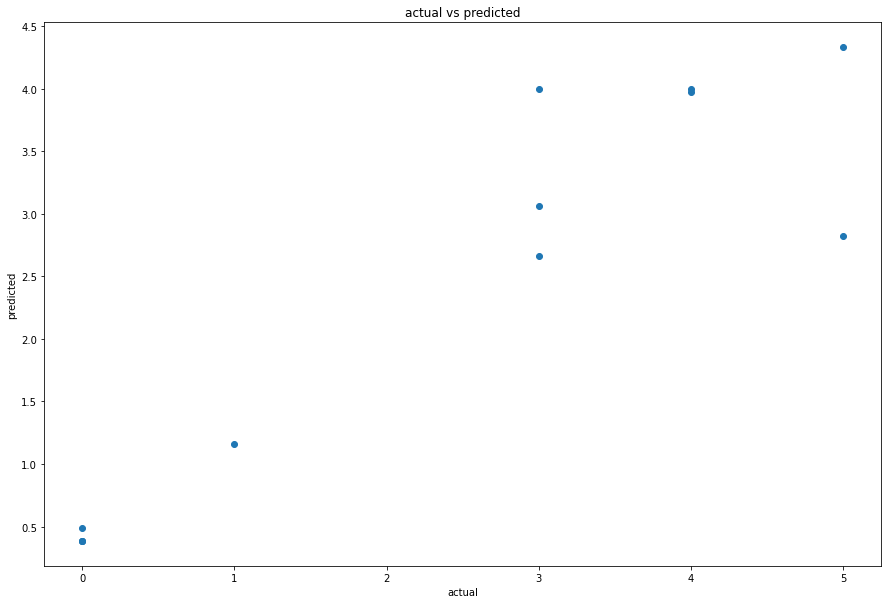

In [64]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')

## Trying other filter based techniques and comparing the accuracy of models

#### Univariate filters evaluate each feature independently with respect to the target variable.

#### Mutual Information (Information Gain)
#### Chi-Squared test
#### Fisher Score

In [65]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [66]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                57 non-null     float64
 1   Paid amount             57 non-null     float64
 2   Rating                  57 non-null     float64
 3   Delivery_Time_In_Min    57 non-null     float64
 4   Status_Cancelled        57 non-null     uint8  
 5   Status_Delivered        57 non-null     uint8  
 6   PromoCode_BF            57 non-null     uint8  
 7   PromoCode_NA            57 non-null     uint8  
 8   PromoCode_PRO           57 non-null     uint8  
 9   Payment mode_CARD       57 non-null     uint8  
 10  Payment mode_COD        57 non-null     uint8  
 11  Payment mode_WALLET     57 non-null     uint8  
 12  PureVeg_N               57 non-null     uint8  
 13  PureVeg_Y               57 non-null     uint8  
 14  Items_CHICKEN;BIRYANI   57 non-null     uint

In [67]:
def show_top_univariate_filters(data, score_func, top_k):

    y= pd.DataFrame(data.iloc[:,2].values)
    column_names=data.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].columns
    X= pd.DataFrame((data.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values),columns=column_names)
    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print 10 best features

In [68]:
show_top_univariate_filters(bdf, 'chi2', 7)

                   Specs      Score
2   Delivery_Time_In_Min  80.685122
1            Paid amount  36.446168
8      Payment mode_CARD  30.714286
16     Items_MIXVEG;RICE  30.714286
3       Status_Cancelled  21.893048
10   Payment mode_WALLET  19.147011
9       Payment mode_COD  18.049370


### Trying filter selections techniques to pick top 7 features for model building. 

In [69]:
#Chi Square Recommended features
mdf=bdf[['Rating','Delivery_Time_In_Min','Paid amount', 'Payment mode_CARD', 'Items_MIXVEG;RICE', 'Status_Cancelled', 'Payment mode_WALLET','Payment mode_COD']]


## Rebuild Model using Chi Square Recommended Features

In [70]:
#Scaling and creating assigning X & Y
Y= pd.DataFrame(mdf.iloc[:,0].values)
from sklearn.preprocessing import StandardScaler
stdScale=StandardScaler()
column_names=mdf.iloc[:, [1,2,3,4,5,6,7]].columns
X= pd.DataFrame(stdScale.fit_transform(mdf.iloc[:, [1,2,3,4,5,6,7]].values),columns=column_names)

In [71]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)

In [72]:
#Fitting multiple linear regression to trainingset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [73]:
#Predicting the test set results & displaying the intercept & co-efficient
Y_pred = regressor.predict(X_test)
print("intercept",regressor.intercept_)
print("coefficients",regressor.coef_)

intercept [2.46228355]
coefficients [[-0.43724347  0.06363328 -0.26441215 -0.26441215 -0.78414031  0.26960655
  -0.06183505]]


In [74]:
#Calculate Metrics
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Square Error=", mean_squared_error(Y_test,Y_pred))
print("Root Mean Square Error=", np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("R Square Value=", r2_score(Y_test,Y_pred))

Mean Square Error= 0.8379299593147326
Root Mean Square Error= 0.9153851426119678
R Square Value= 0.7748844885423107


### It can be observed that the Chi Square features are giving 77.48% accuracy. This is less than the accuracy we got on correlation based feature selection model

# RFE

### The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

### The example below uses RFE with the decission tree algorithm to select the top k features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [76]:
def get_top_k_features_by_rfe(dt, top_k, show_results=True):
    
    #Initializing RFE model
    rfe = RFE(dt, top_k)

    #Transforming data using RFE
    rfe.fit_transform(X1,Y1)  
    
    #Prepare top k feature list 
    indx= 0 
    feature_list = []
    for col in X1.columns:
        if rfe.ranking_[indx] == 1:
            feature_list.append(col)
        indx = indx + 1
    
    if show_results:
        print("Num Features: %d\n" % rfe.n_features_)
        print("Selected Features :" , feature_list)
        #print("Feature Ranking: %s" % rfe.ranking_)  

    return feature_list

In [77]:
dt = DecisionTreeClassifier(random_state=100)
get_top_k_features_by_rfe( dt, 7, show_results=True)

Num Features: 7

Selected Features : ['Paid amount', 'Delivery_Time_In_Min', 'PromoCode_PRO', 'Payment mode_COD', 'Items_DAL;ROTI', 'Items_MIXVEG;RICE', 'Membership_BING']


['Paid amount',
 'Delivery_Time_In_Min',
 'PromoCode_PRO',
 'Payment mode_COD',
 'Items_DAL;ROTI',
 'Items_MIXVEG;RICE',
 'Membership_BING']

In [78]:
#RFE Recommended features
rdf=bdf[['Rating','Paid amount','Delivery_Time_In_Min','PromoCode_PRO', 'Payment mode_COD', 'Items_DAL;ROTI', 'Items_MIXVEG;RICE',
 'Membership_BING']]


### Model Re-Building Based on RFE features selected

In [79]:
#Scaling and creating assigning X & Y
Y= pd.DataFrame(rdf.iloc[:,0].values)
from sklearn.preprocessing import StandardScaler
stdScale=StandardScaler()
column_names=rdf.iloc[:, [1,2,3,4,5,6,7]].columns
X= pd.DataFrame(stdScale.fit_transform(rdf.iloc[:, [1,2,3,4,5,6,7]].values),columns=column_names)

In [80]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)

In [81]:
#Fitting multiple linear regression to trainingset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [82]:
#Predicting the test set results & displaying the intercept & co-efficient
Y_pred = regressor.predict(X_test)
print("intercept",regressor.intercept_)
print("coefficients",regressor.coef_)

intercept [2.455862]
coefficients [[ 0.02064703 -0.37457879  0.13257442 -0.70704272 -0.55391904 -1.71358408
   0.47887352]]


In [83]:
#Calculate Metrics
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Square Error=", mean_squared_error(Y_test,Y_pred))
print("Root Mean Square Error=", np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("R Square Value=", r2_score(Y_test,Y_pred))

Mean Square Error= 0.687067425278652
Root Mean Square Error= 0.8288953041721566
R Square Value= 0.8154147215669293


## It can be observed that the accuracy of RFE based selection model in this case is 81.54%

Text(0.5, 1.0, 'actual vs predicted')

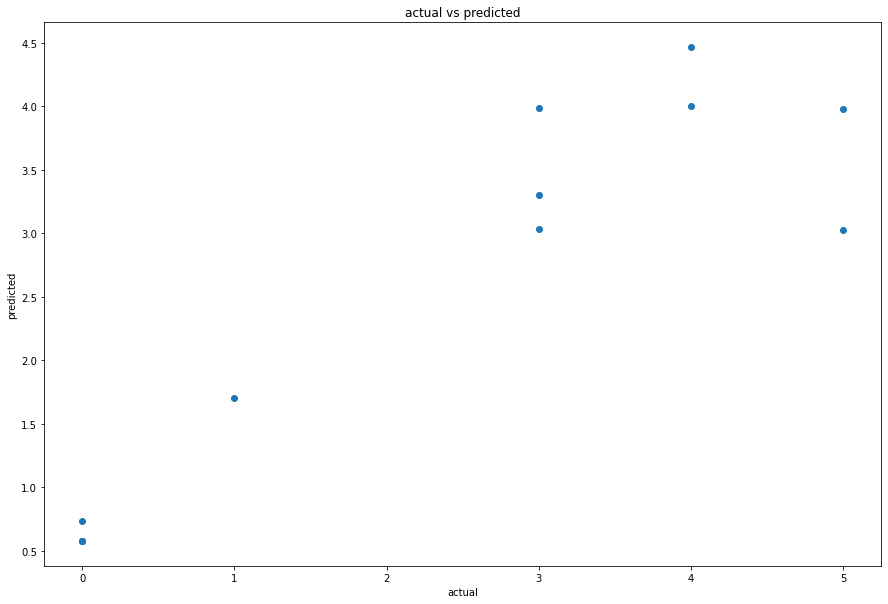

In [84]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')

# Conclusions

# Based on the above analysis and modelling it is recommended to SWIGGYTO to use the regression model designed based on correlation based feature selection technique as it is giving the highest prediction accuracy of 84.30%